# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Try loading one file
'''

my_first_file = '/content/drive/My Drive/Colab Notebooks/YellowCabData/yellow_tripdata_2023-01.parquet'

df = pd.read_parquet(my_first_file)
df.shape
'''

"\n\nmy_first_file = '/content/drive/My Drive/Colab Notebooks/YellowCabData/yellow_tripdata_2023-01.parquet'\n\ndf = pd.read_parquet(my_first_file)\ndf.shape\n"

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

In [6]:
'''
dfvj['pickupdate'] = dfvj['tpep_pickup_datetime'].dt.date
dfvj['pickuphour'] = dfvj['tpep_pickup_datetime'].dt.hour

#Initialize blank DF
sampled_data = pd.DataFrame()

for date in dfvj['pickupdate'].unique():
    for hour in range(24):
        hour_data = dfvj[(dfvj['pickupdate'] == date) & (dfvj['pickuphour'] == hour)]
        sample = hour_data.sample(frac=0.05, random_state=42)
        sampled_data = pd.concat([sampled_data, sample])

print(sampled_data.info())
print(sampled_data.shape)
'''

"\ndfvj['pickupdate'] = dfvj['tpep_pickup_datetime'].dt.date\ndfvj['pickuphour'] = dfvj['tpep_pickup_datetime'].dt.hour\n\n#Initialize blank DF\nsampled_data = pd.DataFrame()\n\nfor date in dfvj['pickupdate'].unique():\n    for hour in range(24):\n        hour_data = dfvj[(dfvj['pickupdate'] == date) & (dfvj['pickuphour'] == hour)]\n        sample = hour_data.sample(frac=0.05, random_state=42)\n        sampled_data = pd.concat([sampled_data, sample])\n\nprint(sampled_data.info())\nprint(sampled_data.shape)\n"

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [7]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
import os

In [10]:
'''
file_names = [
    '/content/drive/My Drive/Colab Notebooks/YellowCabData/yellow_tripdata_2023-01.parquet',
    '/content/drive/My Drive/Colab Notebooks/YellowCabData/yellow_tripdata_2023-02.parquet',
    '/content/drive/My Drive/Colab Notebooks/YellowCabData/yellow_tripdata_2023-03.parquet',
    '/content/drive/My Drive/Colab Notebooks/YellowCabData/yellow_tripdata_2023-04.parquet',
    '/content/drive/My Drive/Colab Notebooks/YellowCabData/yellow_tripdata_2023-05.parquet',
    '/content/drive/My Drive/Colab Notebooks/YellowCabData/yellow_tripdata_2023-06.parquet',
    '/content/drive/My Drive/Colab Notebooks/YellowCabData/yellow_tripdata_2023-07.parquet',
    '/content/drive/My Drive/Colab Notebooks/YellowCabData/yellow_tripdata_2023-08.parquet',
    '/content/drive/My Drive/Colab Notebooks/YellowCabData/yellow_tripdata_2023-09.parquet',
    '/content/drive/My Drive/Colab Notebooks/YellowCabData/yellow_tripdata_2023-10.parquet',
    '/content/drive/My Drive/Colab Notebooks/YellowCabData/yellow_tripdata_2023-11.parquet',
    '/content/drive/My Drive/Colab Notebooks/YellowCabData/yellow_tripdata_2023-12.parquet'
]
'''

"\nfile_names = [\n    '/content/drive/My Drive/Colab Notebooks/YellowCabData/yellow_tripdata_2023-01.parquet',\n    '/content/drive/My Drive/Colab Notebooks/YellowCabData/yellow_tripdata_2023-02.parquet',\n    '/content/drive/My Drive/Colab Notebooks/YellowCabData/yellow_tripdata_2023-03.parquet',\n    '/content/drive/My Drive/Colab Notebooks/YellowCabData/yellow_tripdata_2023-04.parquet',\n    '/content/drive/My Drive/Colab Notebooks/YellowCabData/yellow_tripdata_2023-05.parquet',\n    '/content/drive/My Drive/Colab Notebooks/YellowCabData/yellow_tripdata_2023-06.parquet',\n    '/content/drive/My Drive/Colab Notebooks/YellowCabData/yellow_tripdata_2023-07.parquet',\n    '/content/drive/My Drive/Colab Notebooks/YellowCabData/yellow_tripdata_2023-08.parquet',\n    '/content/drive/My Drive/Colab Notebooks/YellowCabData/yellow_tripdata_2023-09.parquet',\n    '/content/drive/My Drive/Colab Notebooks/YellowCabData/yellow_tripdata_2023-10.parquet',\n    '/content/drive/My Drive/Colab Notebo

In [11]:
'''
all_sampled_data = pd.DataFrame()

for file in file_names:
    dfvj2 = pd.read_parquet(file)

    dfvj2['pickupdate'] = dfvj2['tpep_pickup_datetime'].dt.date
    dfvj2['pickuphour'] = dfvj2['tpep_pickup_datetime'].dt.hour

    #Initialize blank DF
    sampled_data = pd.DataFrame()

    for date in dfvj2['pickupdate'].unique():
        for hour in range(24):
            hour_data = dfvj2[(dfvj2['pickupdate'] == date) & (dfvj2['pickuphour'] == hour)]

            sample = hour_data.sample(frac=0.009, random_state=42)

            sampled_data = pd.concat([sampled_data, sample])

    all_sampled_data = pd.concat([all_sampled_data, sampled_data])

print(all_sampled_data.info())
'''

"\nall_sampled_data = pd.DataFrame()\n\nfor file in file_names:\n    dfvj2 = pd.read_parquet(file)\n\n    dfvj2['pickupdate'] = dfvj2['tpep_pickup_datetime'].dt.date\n    dfvj2['pickuphour'] = dfvj2['tpep_pickup_datetime'].dt.hour\n\n    #Initialize blank DF\n    sampled_data = pd.DataFrame()\n\n    for date in dfvj2['pickupdate'].unique():\n        for hour in range(24):\n            hour_data = dfvj2[(dfvj2['pickupdate'] == date) & (dfvj2['pickuphour'] == hour)]\n\n            sample = hour_data.sample(frac=0.009, random_state=42)\n\n            sampled_data = pd.concat([sampled_data, sample])\n\n    all_sampled_data = pd.concat([all_sampled_data, sampled_data])\n\nprint(all_sampled_data.info())\n"

In [12]:
'''
parquet_2023_path = '/content/drive/My Drive/Colab Notebooks/YellowCabData/sample_2023_data.parquet'
csv_2023_path = '/content/drive/My Drive/Colab Notebooks/YellowCabData/sample_2023_data.csv'
'''

"\nparquet_2023_path = '/content/drive/My Drive/Colab Notebooks/YellowCabData/sample_2023_data.parquet'\ncsv_2023_path = '/content/drive/My Drive/Colab Notebooks/YellowCabData/sample_2023_data.csv'\n"

In [13]:
'''
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

'''

'\n# Take a small percentage of entries from each hour of every date.\n# Iterating through the monthly data:\n#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file\n# Create a single dataframe for the year combining all the monthly data\n\n# Select the folder having data files\nimport os\n\n# Select the folder having data files\nos.chdir(\'/content/Assignments/EDA/data_NYC_Taxi/trip_records\')\n\n# Create a list of all the twelve files to read\nfile_list = os.listdir()\n\n# initialise an empty dataframe\ndf = pd.DataFrame()\n\n\n# iterate through the list of files and sample one by one:\nfor file_name in file_list:\n    try:\n        # file path for the current file\n        file_path = os.path.join(os.getcwd(), file_name)\n\n        # Reading the current file\n\n\n\n        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this\n        

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [14]:
'''# Store the df in csv/parquet
# df.to_parquet('')
all_sampled_data.to_parquet(parquet_2023_path, index=False)

all_sampled_data.to_csv(csv_2023_path, index=False)
'''

"# Store the df in csv/parquet\n# df.to_parquet('')\nall_sampled_data.to_parquet(parquet_2023_path, index=False)\n\nall_sampled_data.to_csv(csv_2023_path, index=False)\n"

In [15]:
file2 = '/content/drive/My Drive/Colab Notebooks/YellowCabData/sample_2023_data.parquet'#to load next day
dfvj2 = pd.read_parquet(file2)
dfvj2.shape

(344758, 22)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [16]:
dfvj2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344758 entries, 0 to 344757
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               344758 non-null  int64         
 1   tpep_pickup_datetime   344758 non-null  datetime64[us]
 2   tpep_dropoff_datetime  344758 non-null  datetime64[us]
 3   passenger_count        333125 non-null  float64       
 4   trip_distance          344758 non-null  float64       
 5   RatecodeID             333125 non-null  float64       
 6   store_and_fwd_flag     333125 non-null  object        
 7   PULocationID           344758 non-null  int64         
 8   DOLocationID           344758 non-null  int64         
 9   payment_type           344758 non-null  int64         
 10  fare_amount            344758 non-null  float64       
 11  extra                  344758 non-null  float64       
 12  mta_tax                344758 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [17]:
# Fix the index and drop any columns that are not needed
print(dfvj2.index)

dfvj2.reset_index(drop=True, inplace=True)

RangeIndex(start=0, stop=344758, step=1)


In [18]:
dfvj2.drop(columns=['pickupdate', 'pickuphour'], inplace=True) #These columns are redundant, we can use other datetime columns

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [19]:
# Combine the two airport fee columns
dfvj2['airport_fee_combined'] = dfvj2['airport_fee'].combine_first(dfvj2['Airport_fee'])

In [20]:
dfvj2.drop(columns=['airport_fee', 'Airport_fee'], inplace=True)

In [21]:
dfvj2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344758 entries, 0 to 344757
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               344758 non-null  int64         
 1   tpep_pickup_datetime   344758 non-null  datetime64[us]
 2   tpep_dropoff_datetime  344758 non-null  datetime64[us]
 3   passenger_count        333125 non-null  float64       
 4   trip_distance          344758 non-null  float64       
 5   RatecodeID             333125 non-null  float64       
 6   store_and_fwd_flag     333125 non-null  object        
 7   PULocationID           344758 non-null  int64         
 8   DOLocationID           344758 non-null  int64         
 9   payment_type           344758 non-null  int64         
 10  fare_amount            344758 non-null  float64       
 11  extra                  344758 non-null  float64       
 12  mta_tax                344758 non-null  floa

**2.1.4** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [22]:
# check where values of fare amount are negative
neg_fare_df = dfvj2[dfvj2['fare_amount'] < 0]
neg_fare_df.shape

(3424, 19)

Did you notice something different in the `RatecodeID` column for above records?

In [23]:
# Analyse RatecodeID for the negative fare amounts
neg_fare_df.RatecodeID.value_counts(dropna=False) #all negative values belongs to below ratecodeids

RatecodeID
1.0    3016
2.0     236
NaN      58
5.0      57
3.0      40
4.0      17
Name: count, dtype: int64

In [24]:
dfvj2.RatecodeID.value_counts(dropna=False)

RatecodeID
1.0     314227
2.0      13241
NaN      11633
5.0       1954
99.0      1856
3.0       1146
4.0        699
6.0          2
Name: count, dtype: int64

In [25]:
# Find which columns have negative values
monetary_cols = ["fare_amount", "extra","tip_amount", 'mta_tax', "tolls_amount", 'improvement_surcharge',"airport_fee_combined", "congestion_surcharge", "total_amount"]

for col in monetary_cols:
    negative_count = (dfvj2[col] < 0).sum()
    if negative_count > 0:
        print(f"Column '{col}' has {negative_count} negative values.")

Column 'fare_amount' has 3424 negative values.
Column 'extra' has 1744 negative values.
Column 'tip_amount' has 15 negative values.
Column 'mta_tax' has 3287 negative values.
Column 'tolls_amount' has 217 negative values.
Column 'improvement_surcharge' has 3384 negative values.
Column 'airport_fee_combined' has 448 negative values.
Column 'congestion_surcharge' has 2719 negative values.
Column 'total_amount' has 3387 negative values.


In [26]:
# fix these negative values
dfvj3 = dfvj2
# I choose set zero for rows with negative values, may not have option to look at these again.
for col in monetary_cols:
    dfvj3[col] = dfvj3[col].clip(lower=0)

In [27]:
dfvj3.shape

(344758, 19)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [28]:
# Find the proportion of missing values in each column

missing_proportion = dfvj3.isnull().sum() / len(dfvj3) * 100
missing_proportion

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.374251
trip_distance            0.000000
RatecodeID               3.374251
store_and_fwd_flag       3.374251
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.374251
airport_fee_combined     3.374251
dtype: float64

In [29]:
dfvj3.passenger_count.value_counts(dropna=False)

passenger_count
1.0    250302
2.0     50878
3.0     12450
NaN     11633
4.0      7125
0.0      5216
5.0      4255
6.0      2895
8.0         4
Name: count, dtype: int64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [30]:
# Display the rows with null values

null_passenger_count_rows = dfvj3[dfvj3['passenger_count'].isnull()]

null_passenger_count_rows.shape

(11633, 19)

In [31]:
dfvj3['passenger_count'].fillna(dfvj3['passenger_count'].median(), inplace=True)#Imputing by median value which is 1.0, seems safest

In [32]:
dfvj3.passenger_count.value_counts(dropna=False)

passenger_count
1.0    261935
2.0     50878
3.0     12450
4.0      7125
0.0      5216
5.0      4255
6.0      2895
8.0         4
Name: count, dtype: int64

In [33]:
#Values with zero pessanger count  most likely are data errors or may be it those are cancelled rides where rides were booked and then cancelled. For now I will leave those
#dfvj3[dfvj3['passenger_count'] == 0].head(20)

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [34]:
# Fix missing values in 'RatecodeID'
null_RateCodeID_rows = dfvj3[dfvj3['RatecodeID'].isnull()]

null_RateCodeID_rows.shape

(11633, 19)

In [35]:
#Since ratecodeID is a categorcial value, it make sense to impute it with most common values - which is mode
dfvj3['RatecodeID'].fillna(dfvj3['RatecodeID'].mode()[0], inplace=True)

In [36]:
dfvj3.RatecodeID.value_counts(dropna=False)#Null values replace by mode which is 1.0

RatecodeID
1.0     325860
2.0      13241
5.0       1954
99.0      1856
3.0       1146
4.0        699
6.0          2
Name: count, dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [37]:
# handle null values in congestion_surcharge
null_congestion_surcharge_rows = dfvj3[dfvj3['congestion_surcharge'].isnull()]

null_congestion_surcharge_rows.shape

(11633, 19)

In [38]:
dfvj3['congestion_surcharge'].fillna(dfvj3['congestion_surcharge'].median(), inplace=True)#Imputing by median value, seems safest

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [39]:
#Handle any remaining missing value
missing_summary = dfvj3.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]
print(missing_summary)

store_and_fwd_flag      11633
airport_fee_combined    11633
dtype: int64


In [40]:
dfvj3.airport_fee_combined.value_counts(dropna=False)

airport_fee_combined
0.00    304086
1.75     21750
NaN      11633
1.25      7289
Name: count, dtype: int64

In [41]:
dfvj3['airport_fee_combined'].median()

0.0

In [42]:
dfvj3['airport_fee_combined'].fillna(dfvj3['airport_fee_combined'].median(), inplace=True)#Median value makes sense to impute, in this case median and mode will be same

In [43]:
dfvj3.store_and_fwd_flag.value_counts(dropna=False)

store_and_fwd_flag
N       331089
None     11633
Y         2036
Name: count, dtype: int64

In [44]:
dfvj3['store_and_fwd_flag'].mode()[0]

'N'

In [45]:
dfvj3['store_and_fwd_flag'].fillna(dfvj3['store_and_fwd_flag'].mode()[0], inplace=True)#Makes sense to impute by mode value here

In [46]:
missing_summary = dfvj3.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]
print(missing_summary)#All missing values handled

Series([], dtype: int64)


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [47]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

dfvj3.describe(include="all")

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count   344758.000000                      344758                      344758   
unique            NaN                         NaN                         NaN   
top               NaN                         NaN                         NaN   
freq              NaN                         NaN                         NaN   
mean         1.737256  2023-07-02 23:04:33.846104  2023-07-02 23:22:02.880948   
min          1.000000         2023-01-01 00:02:19         2023-01-01 00:11:49   
25%          1.000000  2023-04-02 18:32:27.250000  2023-04-02 18:50:10.750000   
50%          2.000000         2023-06-27 18:47:34  2023-06-27 18:58:23.500000   
75%          2.000000  2023-10-06 21:59:32.750000  2023-10-06 22:17:59.500000   
max          6.000000         2023-12-31 23:54:57         2024-01-01 00:07:43   
std          0.444649                         NaN                         NaN   

        passenger_count  trip_distance     RatecodeID store_and_fwd_flag  \
count     344758.000000  344758.000000  344758.000000             344758   
unique              NaN            NaN            NaN                  2   
top                 NaN            NaN            NaN                  N   
freq                NaN            NaN            NaN             342722   
mean           1.358106       4.211373       1.601419                NaN   
min            0.000000       0.000000       1.000000                NaN   
25%            1.000000       1.040000       1.000000                NaN   
50%            1.000000       1.780000       1.000000                NaN   
75%            1.000000       3.400000       1.000000                NaN   
max            8.000000  116439.710000      99.000000                NaN   
std            0.879140     236.149748       7.176505                NaN   

         PULocationID   DOLocationID   payment_type    fare_amount  \
count   344758.000000  344758.000000  344758.000000  344758.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean       165.036188     163.847888       1.186131      19.681030   
min          1.000000       1.000000       0.000000       0.000000   
25%        132.000000     113.000000       1.000000       9.300000   
50%        162.000000     162.000000       1.000000      13.500000   
75%        234.000000     234.000000       1.000000      21.900000   
max        265.000000     265.000000       4.000000     715.600000   
std         64.084767      69.877838       0.557269      18.523557   

                extra        mta_tax     tip_amount   tolls_amount  \
count   344758.000000  344758.000000  344758.000000  344758.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         1.568366       0.490333       3.517964       0.589664   
min          0.000000       0.000000       0.000000       0.000000   
25%          0.000000       0.500000       1.000000       0.000000   
50%          1.000000       0.500000       2.800000       0.000000   
75%          2.500000       0.500000       4.400000       0.000000   
max         11.750000       4.000000     251.290000      77.000000   
std          1.825553       0.069165       4.047971       2.166092   

        improvement_surcharge   total_amount  congestion_surcharge  \
count           344758.000000  344758.000000         344758.000000   
unique                    NaN            NaN                   NaN   
top                       NaN            NaN                   NaN   
freq                      NaN            NaN                   NaN   
mean                 0.989250      28.656980              2.290907   
min                  0.00

In [48]:
dfvj3.describe(include=[np.number])

VendorID  passenger_count  trip_distance     RatecodeID  \
count  344758.000000    344758.000000  344758.000000  344758.000000   
mean        1.737256         1.358106       4.211373       1.601419   
std         0.444649         0.879140     236.149748       7.176505   
min         1.000000         0.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.040000       1.000000   
50%         2.000000         1.000000       1.780000       1.000000   
75%         2.000000         1.000000       3.400000       1.000000   
max         6.000000         8.000000  116439.710000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  344758.000000  344758.000000  344758.000000  344758.000000   
mean      165.036188     163.847888       1.186131      19.681030   
std        64.084767      69.877838       0.557269      18.523557   
min         1.000000       1.000000       0.000000       0.000000   
25%       132.000000     113.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      21.900000   
max       265.000000     265.000000       4.000000     715.600000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  344758.000000  344758.000000  344758.000000  344758.000000   
mean        1.568366       0.490333       3.517964       0.589664   
std         1.825553       0.069165       4.047971       2.166092   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.800000       0.000000   
75%         2.500000       0.500000       4.400000       0.000000   
max        11.750000       4.000000     251.290000      77.000000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          344758.000000  344758.000000         344758.000000   
mean                0.989250      28.656980              2.290907   
std                 0.102507      23.113835              0.692105   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.950000              2.500000   
50%                 1.000000      21.000000              2.500000   
75%                 1.000000      30.720000              2.500000   
max                 1.000000     724.150000              2.500000   

       airport_fee_combined  
count         344758.000000  
mean               0.136831  
std                0.455542  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                1.750000

In [49]:
#dfvj3.VendorID.value_counts(dropna=False)

In [50]:
#dfvj3.passenger_count.value_counts(dropna=False)

In [51]:
#dfvj3.RatecodeID.value_counts(dropna=False)

In [52]:
#dfvj3.payment_type.value_counts(dropna=False)

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [53]:
# remove passenger_count > 6
dfvj3 = dfvj3[dfvj3.passenger_count<=6]

In [54]:
dfvj3.shape

(344754, 19)

In [55]:
# Continue with outlier handling
dfvj3[(dfvj3.trip_distance == 0) & (dfvj3.fare_amount>100)].shape

(126, 19)

In [56]:
#Remove entires where trip_distance is nearly 0 and fare_amount is more than 100
dfvj3 = dfvj3[~((dfvj3.trip_distance == 0) & (dfvj3.fare_amount > 100))]

In [57]:
 #remove entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
dfvj3[((dfvj3.trip_distance == 0) & (dfvj3.fare_amount == 0) & (dfvj3.PULocationID != dfvj3.DOLocationID))].shape

dfvj3 = dfvj3[~((dfvj3.trip_distance == 0) & (dfvj3.fare_amount == 0) & (dfvj3.PULocationID != dfvj3.DOLocationID))]

In [58]:
dfvj3.shape

(344600, 19)

In [59]:
#Remove entries where trip_distance is more than 200 miles.
dfvj3[(dfvj3.trip_distance >200)].shape

dfvj3 = dfvj3[~(dfvj3.trip_distance >200)]

In [60]:
 #Analyze entires where payment_type is 0
dfvj3.payment_type.value_counts(dropna=False)


payment_type
1    268472
2     57784
0     11625
4      4519
3      2189
Name: count, dtype: int64

In [61]:
#Replacing these with mode values makes sense for me, as we had handled blank values which could have created these with earlier replacemnts
dfvj3['payment_type'].replace(0, dfvj3['payment_type'].mode()[0], inplace=True)

In [62]:
#dfvj3.payment_type.value_counts(dropna=False)

In [63]:
# Do any columns need standardising?

#I am not entirely sure at this point of time, which column needs adjustment as I am not yet there where I could see bias caused by columns scales or data behavior. Below may cause issues

# trip_distance - Range: 0 to ~112 miles Median: ~1.78

#fare_amount Range: 0 to ~580 Median: 13.50

#tip_amount Range: 0 to ~251 Median: 2.80


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [64]:
dfvj3.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee_combined']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [65]:
#Categorical: VendorID, RatecodeID, PULocationID, DOLocationID, payment_type.

#Numeric: passenger_count, trip_distance and all monetary columns.

#Datetime: tpep_pickup_datetime, tpep_dropoff_datetime.

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [66]:
#dfvj3.info()

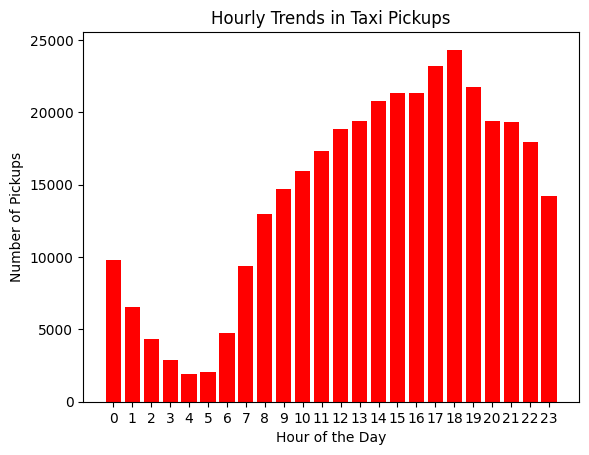

In [67]:
# Find and show the hourly trends in taxi pickups
dfvj3['pickup_hour'] = dfvj3['tpep_pickup_datetime'].dt.hour

hourly_pickups = dfvj3.groupby('pickup_hour').size().reset_index(name='trip_count')

plt.bar(hourly_pickups['pickup_hour'], hourly_pickups['trip_count'], color='red')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.title('Hourly Trends in Taxi Pickups')
plt.xticks(range(24))
plt.show()

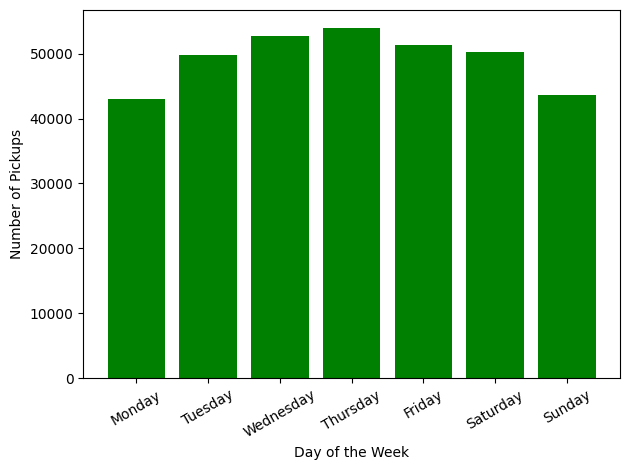

In [68]:
# Find and show the daily trends in taxi pickups (days of the week)

dfvj3['day_name'] = dfvj3['tpep_pickup_datetime'].dt.day_name()

daily_pickups = dfvj3.groupby('day_name').size().reset_index(name='trip_count')

daily_pickups = daily_pickups.set_index('day_name').loc[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]].reset_index()

plt.bar(daily_pickups['day_name'], daily_pickups['trip_count'], color='green')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [69]:
# Show the monthly trends in pickups
dfvj3['month_name'] = dfvj3['tpep_pickup_datetime'].dt.month_name()

monthly_pickups = dfvj3.groupby('month_name').size().reset_index(name='trip_count')

monthly_pickups = monthly_pickups.set_index('month_name').loc[["January", "February", "March", "April", "May", "June","July", "August", "September", "October", "November", "December"]].reset_index()

plt.bar(monthly_pickups['month_name'], monthly_pickups['trip_count'], color='black')
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=30)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [70]:
# Analyse the above parameters
verify_cols = ["fare_amount", "tip_amount", "total_amount","trip_distance" ]

for col in verify_cols:
    zero_count = (dfvj3[col] == 0).sum()
    if zero_count > 0:
        print(f"Column '{col}' has {zero_count} Zero values.")

    negative_count = (dfvj3[col] < 0).sum()
    if negative_count > 0:
        print(f"Column '{col}' has {negative_count} negative values.") #No negative values found

#tip amount can be zero, trip distance can be zero for same place pick up and drop, Fair amount and Total Amount sould not be zero

Column 'fare_amount' has 3517 Zero values.
Column 'tip_amount' has 81546 Zero values.
Column 'total_amount' has 3422 Zero values.
Column 'trip_distance' has 6917 Zero values.


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [71]:
dfvj3.shape

(344589, 22)

In [72]:
# Create a df with non zero entries for the selected parameters.
#Removin only fare_amount and total_amount zero values
dfvj3_no_zeros = dfvj3[(dfvj3['fare_amount'] > 0) & (dfvj3['total_amount'] > 0)].copy()

In [73]:
dfvj3_no_zeros.shape

(341072, 22)

In [74]:
dfvj4 = dfvj3_no_zeros

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [75]:
# Group data by month and analyse monthly revenue

dfvj4['month'] = dfvj4['tpep_pickup_datetime'].dt.month_name()

monthly_revenue = dfvj4.groupby('month')['total_amount'].sum().reset_index(name='monthly_revenue')

monthly_revenue = monthly_revenue.set_index('month').loc[["January", "February", "March", "April", "May", "June","July", "August", "September", "October", "November", "December"]].reset_index()

plt.bar(monthly_revenue['month'], monthly_revenue['monthly_revenue'], color='blue')
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=30)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

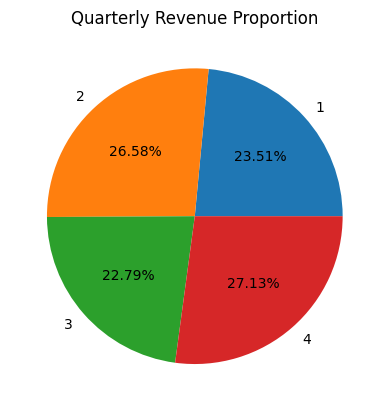

In [76]:
# Calculate proportion of each quarter
dfvj4['quarter'] = dfvj4['tpep_pickup_datetime'].dt.quarter

quarterly = dfvj4.groupby('quarter')['total_amount'].sum().reset_index()

total = quarterly['total_amount'].sum()

quarterly['proportion'] = (quarterly['total_amount'] / total) * 100

plt.pie(quarterly['total_amount'], labels=quarterly['quarter'],autopct='%.2f%%')
plt.title("Quarterly Revenue Proportion")
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [77]:
# Show how trip fare is affected by distance

dfvj5 = dfvj4[dfvj4['trip_distance'] > 0]

dfvj5.plot.scatter(x='trip_distance', y='fare_amount', alpha=0.3)
plt.title("Trip Distance vs. Fare Amount")
plt.show()

corr_value = dfvj5['trip_distance'].corr(dfvj5['fare_amount'])
print(corr_value)#Posetive correlation

0.9426301692565792


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [78]:
# Show relationship between fare and trip duration
dfvj4['trip_duration'] = (dfvj4['tpep_dropoff_datetime'] - dfvj3['tpep_pickup_datetime']).dt.total_seconds() / 60

dfvj4.plot.scatter(x='trip_duration', y='fare_amount', alpha=0.3)
plt.title("Trip Duration vs. Fare Amount")
plt.show()

corr_fare_duration = dfvj4['trip_duration'].corr(dfvj4['fare_amount'])
print("Correlation between fare_amount and trip_duration:", corr_fare_duration)

Correlation between fare_amount and trip_duration: 0.26291340438635025


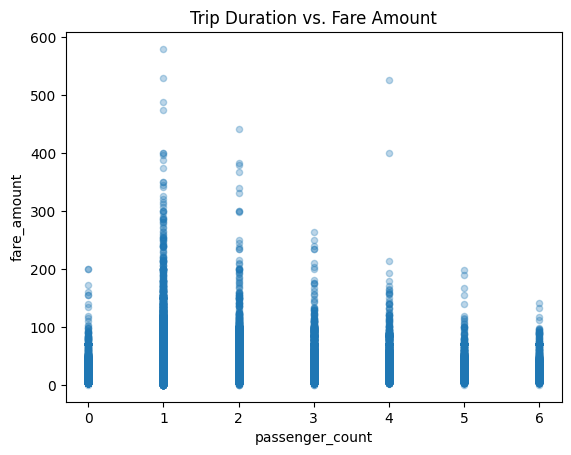

Correlation between fare_amount and passenger_count : 0.04226148725434114


In [79]:
# Show relationship between fare and number of passengers
dfvj4.plot.scatter(x='passenger_count', y='fare_amount', alpha=0.3)
plt.title("Trip Duration vs. Fare Amount")
plt.show()

corr_val = dfvj4['passenger_count'].corr(dfvj4['fare_amount'])
print("Correlation between fare_amount and passenger_count :", corr_val)#No strong correlation

In [80]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='passenger_count', y='fare_amount', data=dfvj4)
plt.ylim(0, 100)
# Labels and title
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount")
plt.title("Fare Amount Distribution by Passenger Count")

Text(0.5, 1.0, 'Fare Amount Distribution by Passenger Count')

In [81]:
# Show relationship between tip and trip distance

dfvj4.plot.scatter(x='trip_distance', y='tip_amount', alpha=0.3)
plt.title("Trip Distance vs. Tip Amount")
plt.show()

corr_value = dfvj4['trip_distance'].corr(dfvj5['tip_amount'])
print(corr_value)#low Positive correlation

0.5943662938785619


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

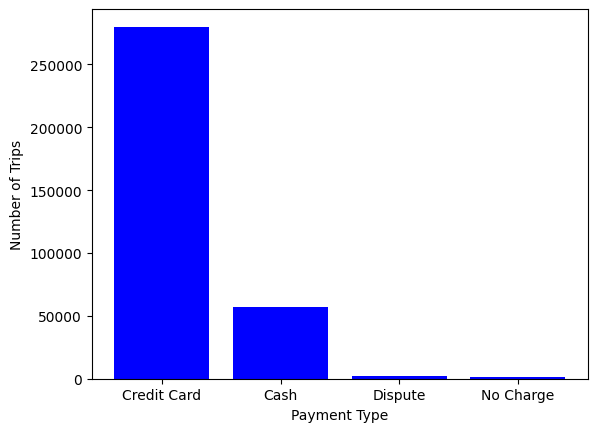

In [82]:
# Analyse the distribution of different payment types (payment_type).

payment_map = {1: "Credit Card",2: "Cash",3: "No Charge",4: "Dispute"}

dfvj4['payment_label'] = dfvj4['payment_type'].map(payment_map)

payment_distribution = dfvj4['payment_label'].value_counts().reset_index()
payment_distribution.columns = ['payment_label', 'count']

plt.bar(payment_distribution['payment_label'], payment_distribution['count'], color='blue')
plt.xlabel("Payment Type")
plt.ylabel("Number of Trips")
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis


For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [83]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [84]:
import geopandas as gpd

shapefile_path = "/content/drive/My Drive/Colab Notebooks/YellowCabData/taxi_zones.shp"

# Read the shapefile using geopandas
zones = gpd.read_file(shapefile_path)
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

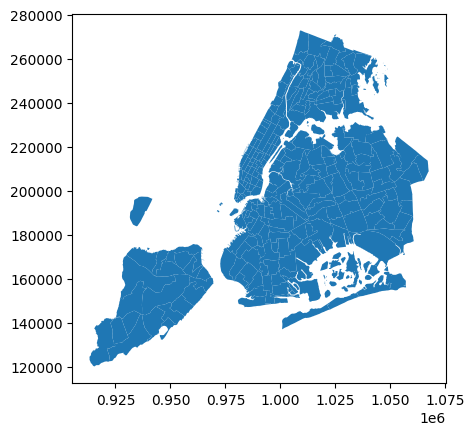

In [85]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [86]:
# Merge zones and trip records using locationID and PULocationID
dfvj4 = dfvj4.merge(zones[['LocationID', 'zone', 'borough']],
                     left_on='PULocationID',
                     right_on='LocationID',
                     how='left')

#dfvj5.drop(columns=['LocationID'], inplace=True)

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [87]:
# Group data by location and calculate the number of trips

location_trip_counts = dfvj4.groupby('PULocationID').size().reset_index(name='trip_count')

print(location_trip_counts.sort_values(by='trip_count', ascending=False).head(30))


     PULocationID  trip_count
118           132       17545
216           237       15940
146           161       15495
215           236       14349
147           162       11877
169           186       11663
124           138       11538
128           142       11310
209           230       11101
148           163        9984
155           170        9865
218           239        9488
213           234        9306
46             48        9173
64             68        9001
127           141        8206
75             79        8032
149           164        7839
227           249        7628
98            107        7344
126           140        6847
217           238        6623
240           263        6504
208           229        6377
224           246        5691
41             43        5680
94            100        5543
85             90        5475
101           113        4649
239           262        4631


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [88]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(location_trip_counts, left_on='LocationID', right_on='PULocationID', how='left')

zones['trip_count'] = zones['trip_count'].fillna(0)

print(zones.head())

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  trip_count  
0           1.0        31.0  
1           NaN         0.0  
2           3.0         7.

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

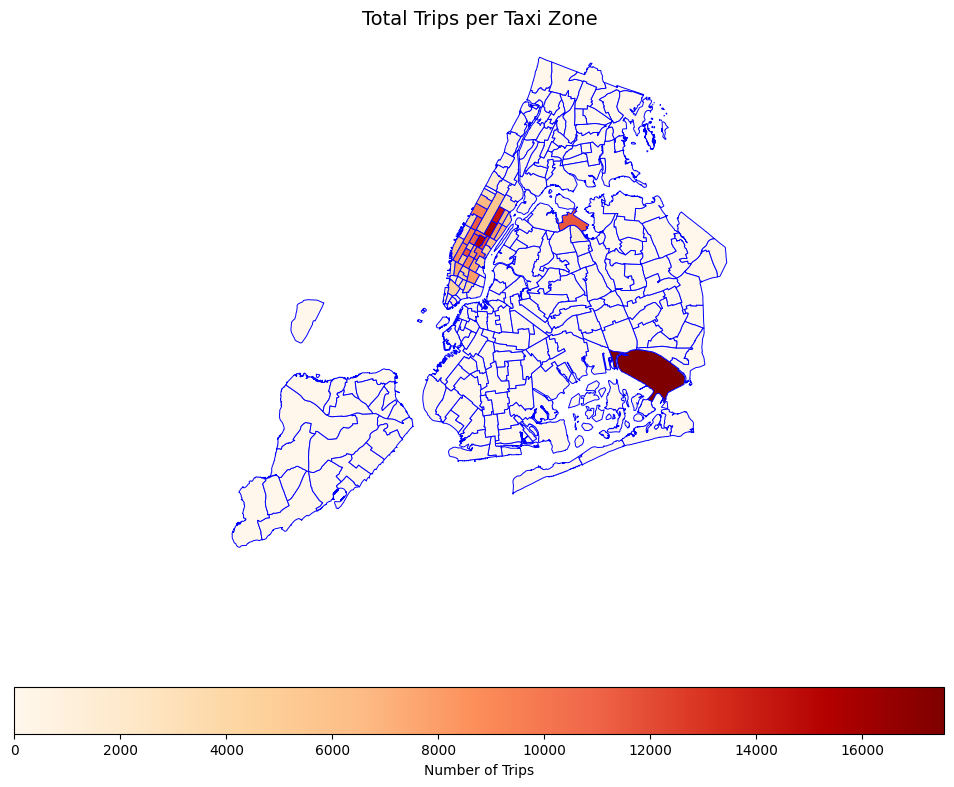

In [89]:
# Define figure and axis

# Plot the map and display it
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

zones.plot(column='trip_count', cmap='OrRd', linewidth=0.7, edgecolor='blue', legend = True, ax=ax, legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"})

ax.set_title("Total Trips per Taxi Zone", fontsize=14)
ax.axis("off")
plt.show()

In [90]:
# can you try displaying the zones DF sorted by the number of trips?
sorted_zones = zones.sort_values(by='trip_count', ascending=False)

print(sorted_zones[['zone', 'borough', 'trip_count']].head(20))

                             zone    borough  trip_count
131                   JFK Airport     Queens     17545.0
236         Upper East Side South  Manhattan     15940.0
160                Midtown Center  Manhattan     15495.0
235         Upper East Side North  Manhattan     14349.0
161                  Midtown East  Manhattan     11877.0
185  Penn Station/Madison Sq West  Manhattan     11663.0
137             LaGuardia Airport     Queens     11538.0
141           Lincoln Square East  Manhattan     11310.0
229     Times Sq/Theatre District  Manhattan     11101.0
162                 Midtown North  Manhattan      9984.0
169                   Murray Hill  Manhattan      9865.0
238         Upper West Side South  Manhattan      9488.0
233                      Union Sq  Manhattan      9306.0
47                   Clinton East  Manhattan      9173.0
67                   East Chelsea  Manhattan      9001.0
140               Lenox Hill West  Manhattan      8206.0
78                   East Villa

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [119]:
# Find routes which have the slowest speeds at different times of the day

dfvj4 = dfvj4[dfvj4['tpep_dropoff_datetime'] >= dfvj4['tpep_pickup_datetime']]#Drop time should always be greater than pickup time, so filtering those out
dfvj4 = dfvj4[dfvj4['trip_distance']!=0] #Drop the entires where trip distance is zero which doesn't make sense for speed calculation

dfvj4['pickup_hour'] = dfvj4['tpep_pickup_datetime'].dt.hour

dfvj4['trip_duration_hours'] = (dfvj4['tpep_dropoff_datetime'] - dfvj4['tpep_pickup_datetime']).dt.total_seconds() / 3600

dfvj4['trip_duration_hours'] = dfvj4['trip_duration_hours'].replace(0, float('nan'))

dfvj4['speed_mph'] = dfvj4['trip_distance'] / dfvj4['trip_duration_hours']

dfvj4 = dfvj4[dfvj4['speed_mph']<200]

slow_routes = dfvj4.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])['speed_mph'].mean().reset_index()

slow_routes_sorted = slow_routes.sort_values(by='speed_mph', ascending=True)

print(slow_routes_sorted)

       PULocationID  DOLocationID  pickup_hour   speed_mph
53203           230           229            4    0.042575
496              10           145           11    0.059840
42678           163           237            2    0.061287
19570           113           244            9    0.084739
5                 1           264           11    0.087167
...             ...           ...          ...         ...
0                 1             1           13  115.200000
46469           179           264           16  132.000000
68960           265           142            7  136.216216
4036             43           264           22  144.000000
6994             53           138           20  174.315789

[68998 rows x 4 columns]


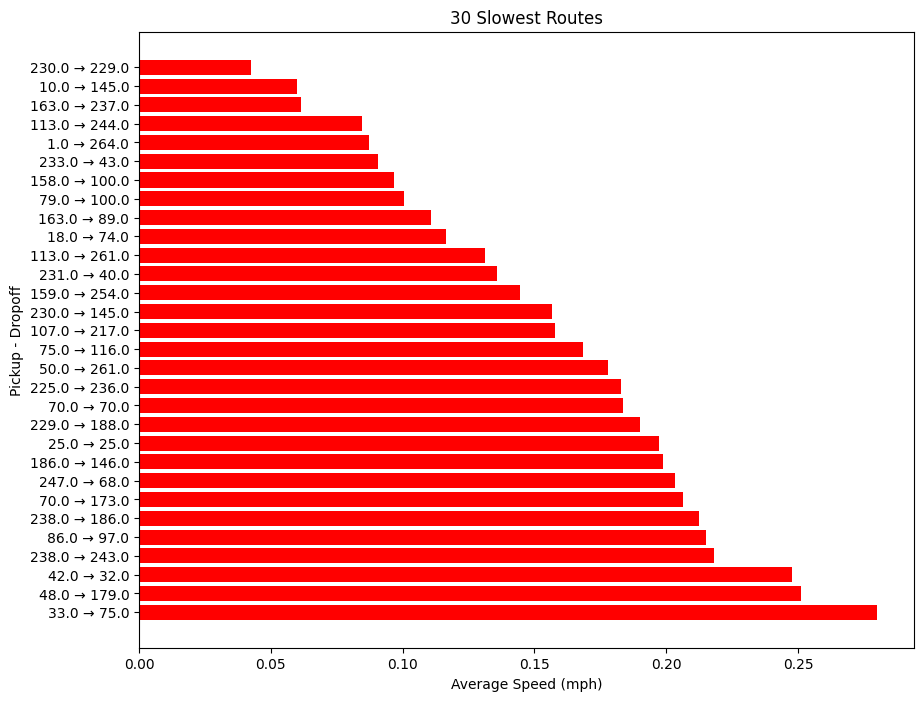

In [126]:
top_slow_routes = slow_routes_sorted.head(30)


top_slow_routes['route_label'] = top_slow_routes.apply(lambda row: f"{row['PULocationID']} → {row['DOLocationID']}", axis=1)


plt.figure(figsize=(10, 8))
plt.barh(top_slow_routes['route_label'], top_slow_routes['speed_mph'], color='red')
plt.xlabel("Average Speed (mph)")
plt.ylabel("Pickup - Dropoff")
plt.title("30 Slowest Routes")
plt.gca().invert_yaxis()
plt.show()

How does identifying high-traffic, high-demand routes help us?

By analyzing slow-speed, high-demand routes, cities and companies can make smarter, data-driven decisions to improve transport efficiency, reduce costs

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

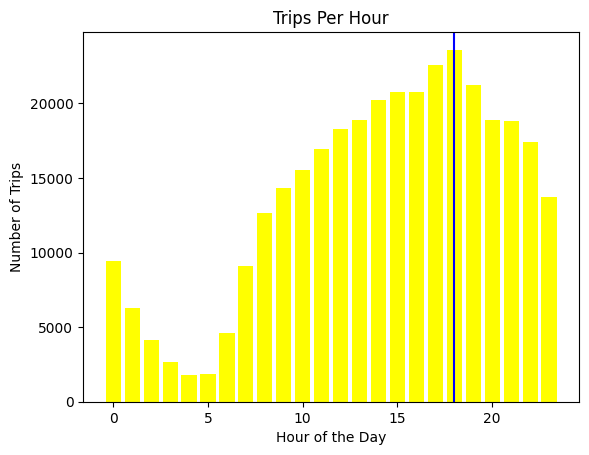

The busiest hour is 18 with 23598 trips.


In [92]:
# Visualise the number of trips per hour and find the busiest hour
trips_per_hour = dfvj4['pickup_hour'].value_counts().sort_index()

#print(trips_per_hour)

busiest_hour = trips_per_hour.idxmax()
busiest_trips = trips_per_hour.max()

plt.bar(trips_per_hour.index, trips_per_hour.values, color='yellow')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Trips Per Hour')
plt.axvline(busiest_hour, color='blue')
plt.show()

print(f"The busiest hour is {busiest_hour} with {busiest_trips} trips.")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [93]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.009

trips_per_hour = dfvj4['pickup_hour'].value_counts()

busiest_hours = trips_per_hour.nlargest(5)
print(busiest_hours)

actual_trips = busiest_hours / sample_fraction

print(actual_trips)

pickup_hour
18    23598
17    22592
19    21209
15    20772
16    20770
Name: count, dtype: int64
pickup_hour
18    2.622000e+06
17    2.510222e+06
19    2.356556e+06
15    2.308000e+06
16    2.307778e+06
Name: count, dtype: float64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

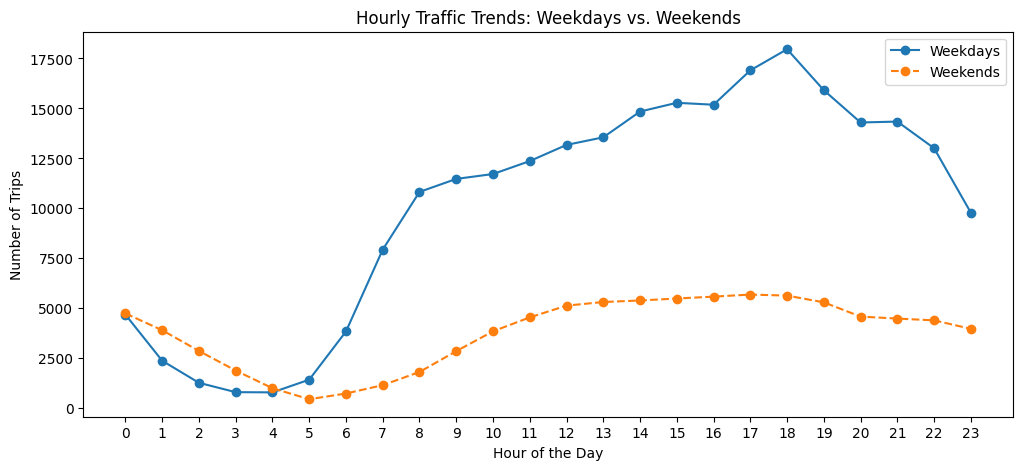

In [94]:
# Compare traffic trends for the week days and weekends
dfvj4['is_weekend'] = dfvj4['day_name'].isin(['Saturday', 'Sunday'])

weekday_trips = dfvj4[~dfvj4['is_weekend']].groupby('pickup_hour').size()
weekend_trips = dfvj4[dfvj4['is_weekend']].groupby('pickup_hour').size()

plt.figure(figsize=(12, 5))
plt.plot(weekday_trips.index, weekday_trips.values, label='Weekdays', marker='o', linestyle='-')
plt.plot(weekend_trips.index, weekend_trips.values, label='Weekends', marker='o', linestyle='--')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Hourly Traffic Trends: Weekdays vs. Weekends')
plt.legend()
plt.xticks(range(24))

plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

Weekdays show strong morning & evening peaks (work-related travel).
Weekends have a balanced pattern, with increased evening activity.
Identifying busy & quiet hours helps improve planning for and travel planning

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [95]:
# Find top 10 pickup and dropoff zones

top_pickup_zones = dfvj5['PULocationID'].value_counts().nlargest(10)
top_dropoff_zones = dfvj5['DOLocationID'].value_counts().nlargest(10)

pickup_data = dfvj5[dfvj5['PULocationID'].isin(top_pickup_zones.index)]
dropoff_data = dfvj5[dfvj5['DOLocationID'].isin(top_dropoff_zones.index)]

pickup_trends = pickup_data.groupby(['pickup_hour', 'PULocationID']).size().unstack()
dropoff_trends = dropoff_data.groupby(['pickup_hour', 'DOLocationID']).size().unstack()

In [96]:
#Pickup trend
plt.figure(figsize=(12, 6))
pickup_trends.plot(ax=plt.gca(), marker='p')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.title('Hourly Pickup Trends for Top 10 Zones')
plt.legend()
plt.xticks(range(24))
plt.show()

In [97]:
#DrofOff Trends
plt.figure(figsize=(12,6))
dropoff_trends.plot(ax=plt.gca(),marker='d')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Dropoffs')
plt.title('Hourly Dropoff Trends for Top 10 Zones')
plt.legend()
plt.xticks(range(24))
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [98]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = dfvj5['PULocationID'].value_counts()
dropoff_counts = dfvj5['DOLocationID'].value_counts()

pickup_drop_ratio = pd.DataFrame({'pickup_count': pickup_counts, 'dropoff_count': dropoff_counts})

#pickup_drop_ratio.isna().sum()
pickup_drop_ratio.fillna(0, inplace=True)

pickup_drop_ratio['pickup_drop_ratio'] = pickup_drop_ratio['pickup_count'] / pickup_drop_ratio['dropoff_count'].replace(0, float('inf'))

print(pickup_drop_ratio.nlargest(10,'pickup_drop_ratio'))
print(pickup_drop_ratio.nsmallest(10,'pickup_drop_ratio'))


     pickup_count  dropoff_count  pickup_drop_ratio
70         1487.0            204           7.289216
132       17212.0           3818           4.508119
138       11452.0           4360           2.626606
186       11547.0           7325           1.576382
43         5631.0           4052           1.389684
114        4429.0           3238           1.367820
249        7507.0           5578           1.345823
162       11754.0           9266           1.268509
142       11180.0           9461           1.181693
234        9164.0           7783           1.177438
     pickup_count  dropoff_count  pickup_drop_ratio
30            0.0              5                0.0
57            0.0              5                0.0
58            0.0              9                0.0
84            0.0              5                0.0
109           0.0              2                0.0
111           0.0              3                0.0
115           0.0              2                0.0
120         

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [99]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_data = dfvj5[dfvj5['pickup_hour'].isin([23, 0, 1, 2, 3, 4, 5])]

print(night_data['PULocationID'].value_counts().nlargest(10))

print(night_data['DOLocationID'].value_counts().nlargest(10))

PULocationID
79     2862
132    2532
249    2300
48     1911
148    1814
114    1602
230    1479
186    1255
164    1137
68     1122
Name: count, dtype: int64
DOLocationID
79     1500
48     1296
170    1129
107    1055
68     1044
141     975
263     951
230     877
249     862
229     845
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [100]:
# Filter for night hours (11 PM to 5 AM)
night_data = dfvj5[dfvj5['pickup_hour'].isin([23, 0, 1, 2, 3, 4, 5])]
day_data = dfvj5[~dfvj5['pickup_hour'].isin([23, 0, 1, 2, 3, 4, 5])]

night_revenue = night_data['total_amount'].sum() + night_data['tip_amount'].sum()
day_revenue = day_data['total_amount'].sum() + day_data['tip_amount'].sum()

revenue_share_night = night_revenue / (night_revenue + day_revenue)
revenue_share_day = day_revenue / (night_revenue + day_revenue)

print(revenue_share_night)#12 Percent

print(revenue_share_day)#Almost 90 percent

0.12091615538847085
0.8790838446115292


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [101]:
# Analyse the fare per mile per passenger for different passenger counts

dfvj5['passenger_count'] = dfvj5['passenger_count'].replace(0, float('nan'))

dfvj5['fare_per_mile'] = dfvj5['fare_amount'] / dfvj5['trip_distance']

dfvj5['fare_per_mile_per_passenger'] = dfvj5['fare_per_mile'] / dfvj5['passenger_count']

fare_analysis = dfvj5.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

fare_analysis


passenger_count  fare_per_mile_per_passenger
0              1.0                    11.105898
1              2.0                     6.501357
2              3.0                     4.312038
3              4.0                     5.735966
4              5.0                     1.660613
5              6.0                     1.537548

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

      day_name  pickup_hour  fare_per_mile
0       Friday            0      17.909697
1       Friday            1      18.134120
2       Friday            2      17.473676
3       Friday            3      18.540935
4       Friday            4       7.001916
..         ...          ...            ...
163  Wednesday           19       9.161622
164  Wednesday           20       8.555515
165  Wednesday           21      10.904454
166  Wednesday           22       9.464365
167  Wednesday           23      11.270906

[168 rows x 3 columns]


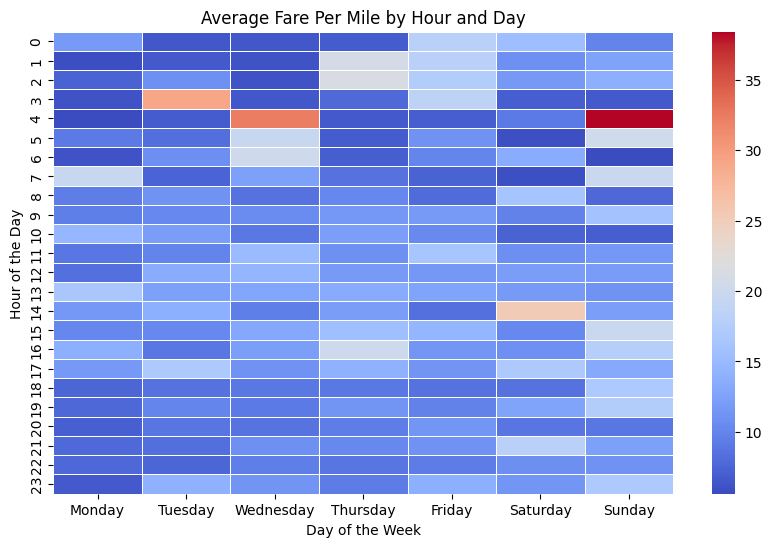

In [132]:
# Compare the average fare per mile for different days and for different times of the day

dfvj5['fare_per_mile'] = dfvj5['fare_amount'] / dfvj5['trip_distance']

fare_per_mile_by_hour_day = dfvj5.groupby(['day_name', 'pickup_hour'])['fare_per_mile'].mean().reset_index()

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
fare_per_mile_by_hour_day['day_name'] = pd.Categorical(fare_per_mile_by_hour_day['day_name'], categories=day_order, ordered=True)

print(fare_per_mile_by_hour_day)

heatmap_data = fare_per_mile_by_hour_day.pivot(index="pickup_hour", columns="day_name", values="fare_per_mile")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, linewidths=0.5)
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")
plt.title("Average Fare Per Mile by Hour and Day")
plt.show()


In [128]:
#dfvj5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334405 entries, 0 to 344757
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   VendorID                     334405 non-null  int64         
 1   tpep_pickup_datetime         334405 non-null  datetime64[us]
 2   tpep_dropoff_datetime        334405 non-null  datetime64[us]
 3   passenger_count              329350 non-null  float64       
 4   trip_distance                334405 non-null  float64       
 5   RatecodeID                   334405 non-null  float64       
 6   store_and_fwd_flag           334405 non-null  object        
 7   PULocationID                 334405 non-null  int64         
 8   DOLocationID                 334405 non-null  int64         
 9   payment_type                 334405 non-null  int64         
 10  fare_amount                  334405 non-null  float64       
 11  extra                        33

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [134]:
# Compare fare per mile for different vendors

#dfvj5['fare_per_mile'] = dfvj5['fare_amount'] / dfvj5['trip_distance']

vendor_fare_comparison = dfvj5.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().reset_index()

#print(dfvj5['VendorID'].value_counts())
print(vendor_fare_comparison[vendor_fare_comparison['VendorID'] == 1])
print(vendor_fare_comparison[vendor_fare_comparison['VendorID'] == 6])
print(vendor_fare_comparison[vendor_fare_comparison['VendorID'] == 2])

plt.figure(figsize=(12, 6))
vendor_fare_comparison.pivot(index='pickup_hour', columns='VendorID', values='fare_per_mile').plot(ax=plt.gca(), marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare Per Mile ($)')
plt.title('Hourly Fare Per Mile Comparison by Vendor')
plt.legend(title="Vendor ID")
plt.xticks(range(24))
plt.show()

    VendorID  pickup_hour  fare_per_mile
0          1            0       7.121271
1          1            1       6.654734
2          1            2       6.823418
3          1            3       6.495862
4          1            4       6.359371
5          1            5       7.730064
6          1            6       6.439589
7          1            7       7.213434
8          1            8       8.166993
9          1            9       9.258399
10         1           10       8.527821
11         1           11       9.050990
12         1           12       8.667393
13         1           13       8.734380
14         1           14       8.585037
15         1           15       8.654666
16         1           16       8.795143
17         1           17       8.551119
18         1           18       8.272217
19         1           19       7.995887
20         1           20       7.989977
21         1           21       7.175485
22         1           22       7.069113
23         1    

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [104]:
# Defining distance tiers

dfvj5['distance_tier'] = dfvj5['trip_distance'].apply(lambda d: "0-2 miles" if d <= 2 else "2-5 miles" if d <= 5 else "More than 5 miles")

print(dfvj5.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index())

   VendorID      distance_tier  fare_per_mile
0         1          0-2 miles       9.970700
1         1          2-5 miles       6.398683
2         1  More than 5 miles       4.429773
3         2          0-2 miles      18.880989
4         2          2-5 miles       6.545095
5         2  More than 5 miles       4.491042
6         6          0-2 miles      20.139746
7         6          2-5 miles       7.393015
8         6  More than 5 miles       4.576734


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [137]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

dfvj5['tip_percent'] = (dfvj5['tip_amount'] / dfvj5['fare_amount']) * 100

print(dfvj5.groupby('trip_distance')['tip_percent'].mean().reset_index())

print(dfvj5.groupby('passenger_count')['tip_percent'].mean().reset_index())

print(dfvj5.groupby('pickup_hour')['tip_percent'].mean().reset_index())

'''
Passengers tend to tip less on very short rides.
If the fare is low, tips may also be small.
During busy hours, people may be in a hurry and tip less.
Larger groups might tip less per person.
Some riders tip less or not at all when paying by card.
'''

      trip_distance  tip_percent
0              0.01     6.189099
1              0.02     6.214071
2              0.03     5.304241
3              0.04     8.962139
4              0.05    16.024783
...             ...          ...
3019          82.91     0.000000
3020          84.16     0.000000
3021          84.80     5.263158
3022          94.10     3.333333
3023         111.98     2.500000

[3024 rows x 2 columns]
   passenger_count  tip_percent
0              1.0    20.522368
1              2.0    19.768568
2              3.0    18.968806
3              4.0    17.656340
4              5.0    68.002829
5              6.0    20.525678
    pickup_hour  tip_percent
0             0    20.388359
1             1    20.056138
2             2    20.564097
3             3    19.322301
4             4    18.156048
5             5    17.089779
6             6    18.522489
7             7    19.851581
8             8    19.942892
9             9    19.669837
10           10    19.236947
11     

'\nPassengers tend to tip less on very short rides.\nIf the fare is low, tips may also be small.\nDuring busy hours, people may be in a hurry and tip less.\nLarger groups might tip less per person.\nSome riders tip less or not at all when paying by card.\n'

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [106]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

low_tip_trips = dfvj5[dfvj5['tip_percent'] < 10]
high_tip_trips = dfvj5[dfvj5['tip_percent'] > 25]

print(low_tip_trips.groupby('trip_distance')['tip_percent'].mean().reset_index())

print(low_tip_trips.groupby('passenger_count')['tip_percent'].mean().reset_index())

'''
Longer trips tend to get higher tips.
Higher fare rides are associated with better tipping behavior.
More passengers may increase or decrease tipping (depends on group behavior).
'''


      trip_distance  tip_percent
0              0.01     0.112284
1              0.02     0.046522
2              0.03     0.209646
3              0.04     0.194921
4              0.05     0.148875
...             ...          ...
2643          82.91     0.000000
2644          84.16     0.000000
2645          84.80     5.263158
2646          94.10     3.333333
2647         111.98     2.500000

[2648 rows x 2 columns]
   passenger_count  tip_percent
0              1.0     1.151297
1              2.0     0.967483
2              3.0     0.835944
3              4.0     0.613753
4              5.0     1.097922
5              6.0     0.960953


'\nLonger trips tend to get higher tips.\nHigher fare rides are associated with better tipping behavior.\nMore passengers may increase or decrease tipping (depends on group behavior).\n'

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [107]:
# See how passenger count varies across hours and days

passenger_by_hour = dfvj5.groupby('pickup_hour')['passenger_count'].mean().reset_index()

passenger_by_day = dfvj5.groupby('day_name')['passenger_count'].mean().reset_index()

passenger_by_day = passenger_by_day.set_index('day_name').loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].reset_index()

print(passenger_by_hour)

print(passenger_by_day)

#I don't see any meaning ful pattern here, except on weekend pessanger count is slightly higher

    pickup_hour  passenger_count
0             0         1.403450
1             1         1.444910
2             2         1.437195
3             3         1.435321
4             4         1.337612
5             5         1.250538
6             6         1.227172
7             7         1.271609
8             8         1.285795
9             9         1.304001
10           10         1.342011
11           11         1.363888
12           12         1.373999
13           13         1.397045
14           14         1.406013
15           15         1.416430
16           16         1.406681
17           17         1.391341
18           18         1.383646
19           19         1.392232
20           20         1.401375
21           21         1.418329
22           22         1.422140
23           23         1.409799
    day_name  passenger_count
0     Monday         1.355416
1    Tuesday         1.334932
2  Wednesday         1.328630
3   Thursday         1.342907
4     Friday         1.39

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [108]:
# How does passenger count vary across zones
passenger_by_zone = dfvj5.groupby('PULocationID')['passenger_count'].sum().reset_index()

passenger_by_zone_sorted = passenger_by_zone.sort_values(by="passenger_count", ascending=False).head(50)  # Top 50 zones

plt.figure(figsize=(12, 6))
plt.bar(passenger_by_zone_sorted['PULocationID'].astype(str), passenger_by_zone_sorted['passenger_count'], color='red')
plt.xlabel("Pickup Zone")
plt.ylabel("Total Passenger Count")
plt.title("Passenger Count Across Top 50 Zones")
plt.xticks(rotation=60)
plt.show()

In [109]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

shapefile_path = "/content/drive/My Drive/Colab Notebooks/YellowCabData/taxi_zones.shp"
zones_with_trips = gpd.read_file(shapefile_path)

avg_passenger_by_zone = dfvj5.groupby('PULocationID', as_index=False)['passenger_count'].mean().rename(columns={'passenger_count': 'avg_passenger_count'})

zones_with_trips = zones_with_trips.merge(avg_passenger_by_zone, left_on='LocationID', right_on='PULocationID', how='left')

fig, ax = plt.subplots(figsize=(12, 10))
zones_with_trips.plot(column='avg_passenger_count', cmap='OrRd', linewidth=0.7, edgecolor='blue',legend=True, ax=ax, legend_kwds={'label': "Avg Passenger Count", 'orientation': "horizontal"})
ax.set_title("Average Passenger Count per Taxi Zone", fontsize=14)
ax.axis("off")
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

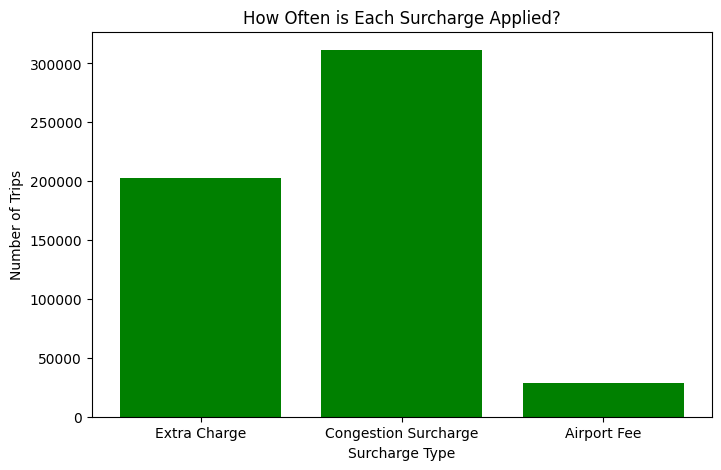

         Surcharge Type   Count
0          Extra Charge  203097
1  Congestion Surcharge  311397
2           Airport Fee   28632


In [110]:
# How often is each surcharge applied?

surcharge_counts = {
    "Extra Charge": (dfvj5['extra'] > 0).sum(),
    "Congestion Surcharge": (dfvj5['congestion_surcharge'] > 0).sum(),
    "Airport Fee": (dfvj5['airport_fee_combined'] > 0).sum()
}

surcharge_df = pd.DataFrame(list(surcharge_counts.items()), columns=['Surcharge Type', 'Count'])

plt.figure(figsize=(8, 5))
plt.bar(surcharge_df['Surcharge Type'], surcharge_df['Count'], color='green')
plt.xlabel("Surcharge Type")
plt.ylabel("Number of Trips")
plt.title("How Often is Each Surcharge Applied")
plt.show()

print(surcharge_df)

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [111]:
top_pickup_zones = dfvj5['PULocationID'].value_counts().head(10)
top_dropoff_zones = dfvj5['DOLocationID'].value_counts().head(10)

peak_hours = dfvj5.groupby('pickup_hour').size().reset_index(name="trip_count")

dfvj5['speed_mph'] = dfvj5['trip_distance'] / (dfvj5['tpep_dropoff_datetime'] - dfvj5['tpep_pickup_datetime']).dt.total_seconds() * 3600

dfvj5 = dfvj5[(dfvj5['speed_mph'] > 0) & (dfvj5['speed_mph'] < 100)]#to remove unrealistic speed

slow_routes = dfvj5.groupby(['PULocationID', 'DOLocationID'])['speed_mph'].mean().nsmallest(10)

print("Top 10 Pickup Zones:\n", top_pickup_zones)
print("\nTop 10 Dropoff Zones:\n", top_dropoff_zones)
print("\nPeak Hours for Demand:\n", peak_hours.sort_values(by="trip_count", ascending=False).head(5))
print("\nTop 10 Slow Routes:\n", slow_routes)

'''Summary of recommendations
Dispatch More Taxis to High-Demand Areas, Send more cabs to peak pickup zones before rush hours.

Route Optimization for Faster Service,Use alternate paths & dynamic pricing for traffic-heavy areas.

Match drop-off zones with nearby pickups for efficiency. Offer discounts on return rides to reduce idle taxis.

Use historical peak-hour trends to distribute taxis efficiently. Implement real-time surge pricing when demand spikes
'''

Top 10 Pickup Zones:
 PULocationID
132    17212
237    15803
161    15356
236    14200
162    11754
186    11547
138    11452
142    11180
230    10936
163     9872
Name: count, dtype: int64

Top 10 Dropoff Zones:
 DOLocationID
236    14737
237    14260
161    13276
230    10372
170     9976
142     9461
239     9396
162     9266
141     8888
163     8604
Name: count, dtype: int64

Peak Hours for Demand:
     pickup_hour  trip_count
18           18       23598
17           17       22592
19           19       21207
15           15       20771
16           16       20770

Top 10 Slow Routes:
 PULocationID  DOLocationID
10            145             0.059840
1             264             0.087167
18            74              0.116505
159           254             0.144520
247           68              0.203275
86            97              0.214925
42            32              0.247593
33            75              0.280000
51            51              0.298755
63            76       

'Summary of recommendations\nDispatch More Taxis to High-Demand Areas, Send more cabs to peak pickup zones before rush hours.\n\nRoute Optimization for Faster Service,Use alternate paths & dynamic pricing for traffic-heavy areas.\n\nMatch drop-off zones with nearby pickups for efficiency. Offer discounts on return rides to reduce idle taxis.\n\nUse historical peak-hour trends to distribute taxis efficiently. Implement real-time surge pricing when demand spikes\n'

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [112]:
'''
Position more taxis in residential areas (6 AM - 9 AM) to match morning demand.
Increase taxis near transit hubs & corporate zones (5 PM - 8 PM) for evening rush.
Deploy more taxis near nightlife areas (10 PM - 2 AM) on weekends.
Adjust cab supply seasonally (increase near tourist attractions in summer).
Balance cab distribution between weekdays (corporate areas) & weekends (entertainment hubs)
'''

'\nPosition more taxis in residential areas (6 AM - 9 AM) to match morning demand.\nIncrease taxis near transit hubs & corporate zones (5 PM - 8 PM) for evening rush.\nDeploy more taxis near nightlife areas (10 PM - 2 AM) on weekends.\nAdjust cab supply seasonally (increase near tourist attractions in summer).\nBalance cab distribution between weekdays (corporate areas) & weekends (entertainment hubs)\n'

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [113]:
'''
Increase fares in high-demand zones (Top 10 pickup locations).
Apply surge pricing for peak hours (morning/evening rush, weekend nights).
Offer discounts in low-demand hours (early mornings, post-lunch slump).
Match competitors’ pricing per mile to stay competitive.
'''

'\nIncrease fares in high-demand zones (Top 10 pickup locations).\nApply surge pricing for peak hours (morning/evening rush, weekend nights).\nOffer discounts in low-demand hours (early mornings, post-lunch slump).\nMatch competitors’ pricing per mile to stay competitive.\n'